# Librerias

In [1]:
# cargamos las librerías que nos hacen falta para trabajar. 

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from scipy import stats

pd.options.display.max_columns = None # recordamos que este comando nos permitía ver todas las columnas de dataframe

# Cargamos datos

In [2]:
df = pd.read_csv("../01_data/train_nonull_nooutliers_encoding.csv", index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded
id,,,,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353,3.0,5.0,0.0
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183,4.0,6.0,5.0
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983,4.0,3.0,3.0
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371,2.0,4.0,0.0
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588,3.0,4.0,4.0


# NORMALIZACIÓN

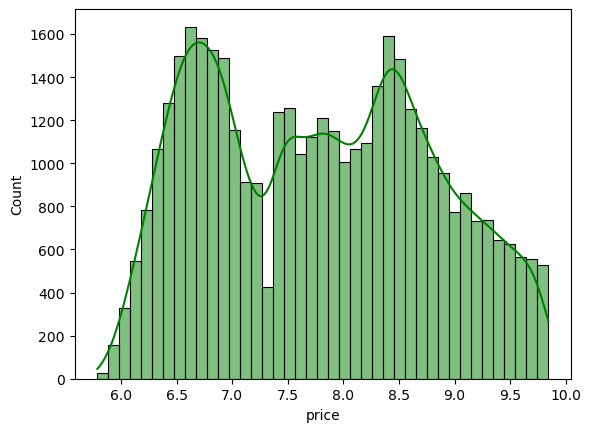

In [3]:
sns.histplot(df["price"], 
             kde = True, 
             color = "green");

In [4]:
stats.shapiro(df["price"])

ShapiroResult(statistic=0.9629883170127869, pvalue=0.0)

## Transformación logarítmica

In [5]:
df['price_LOG'] = df['price'].apply(lambda x: np.log(x) if x != 0 else 0)

In [6]:
stats.shapiro(df["price_LOG"])

ShapiroResult(statistic=0.9636781811714172, pvalue=0.0)

## Transformación con raíz cuadrada

In [7]:
df['price_SQRT'] = df['price'].apply(lambda x: math.sqrt(x))

In [8]:
stats.shapiro(df["price_SQRT"])

ShapiroResult(statistic=0.9640153050422668, pvalue=0.0)

## Sklearn MinMaxScaller

In [9]:
from sklearn.preprocessing import MinMaxScaler

# construir el modelo de escalador
minmax = MinMaxScaler()

# ajustamos el modelo utilizando nuestro set de datos
X_normalizadas = minmax.fit_transform(df[["price"]])

# lo unimos a nuestro dataframe original
df["price_NORM2"] = X_normalizadas

In [10]:
stats.shapiro(df["price_NORM2"])

ShapiroResult(statistic=0.9629886150360107, pvalue=0.0)

# ESTANDARIZACIÓN

## Sklearn RobustScaler

In [12]:
# creamos una lista con todas las variables numericas predictoras, eliminamos la variable respuesta porque esa esta normalizada
num_col = df.select_dtypes(include = np.number).columns
num_col

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_encoded',
       'color_encoded', 'clarity_encoded', 'price_LOG', 'price_SQRT',
       'price_NORM2'],
      dtype='object')

In [13]:
# iniciamos la clase para escalar
scaler_robust = RobustScaler()

# ajustamos nuestros datos
X_escaladas_robust = scaler_robust.fit_transform(df[num_col])

# hacemos una copia del dataframe para insertar las columnas estandarizadas
df_robust = df.copy()


# insertamos los valores estandarizados en el DataFrame
df_robust[num_col] = X_escaladas_robust
df_robust.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,cut_encoded,color_encoded,clarity_encoded,price_LOG,price_SQRT,price_NORM2
id,,,,,,,,,,,,,,,,
0,-0.655738,Premium,D,SI2,0.461538,0.333333,-0.754098,-0.784530,-0.750000,-0.824975,0.0,0.333333,-1.5,-0.900067,-0.861790,-0.824975
1,0.508197,Ideal,E,VVS2,0.692308,-0.333333,0.398907,0.419890,0.464286,0.811100,0.5,0.666667,1.0,0.736464,0.773068,0.811100
2,0.032787,Ideal,F,VS2,0.000000,0.666667,0.010929,0.022099,0.017857,0.117358,0.5,-0.333333,0.0,0.114415,0.115938,0.117358
3,0.622951,Very Good,G,SI2,1.076923,0.000000,0.464481,0.441989,0.535714,0.341668,-0.5,0.000000,-1.5,0.325226,0.333503,0.341668
4,-0.557377,Premium,G,VS1,0.384615,0.666667,-0.650273,-0.635359,-0.625000,-0.689117,0.0,0.000000,0.5,-0.738724,-0.713660,-0.689117


IndexError: list index out of range

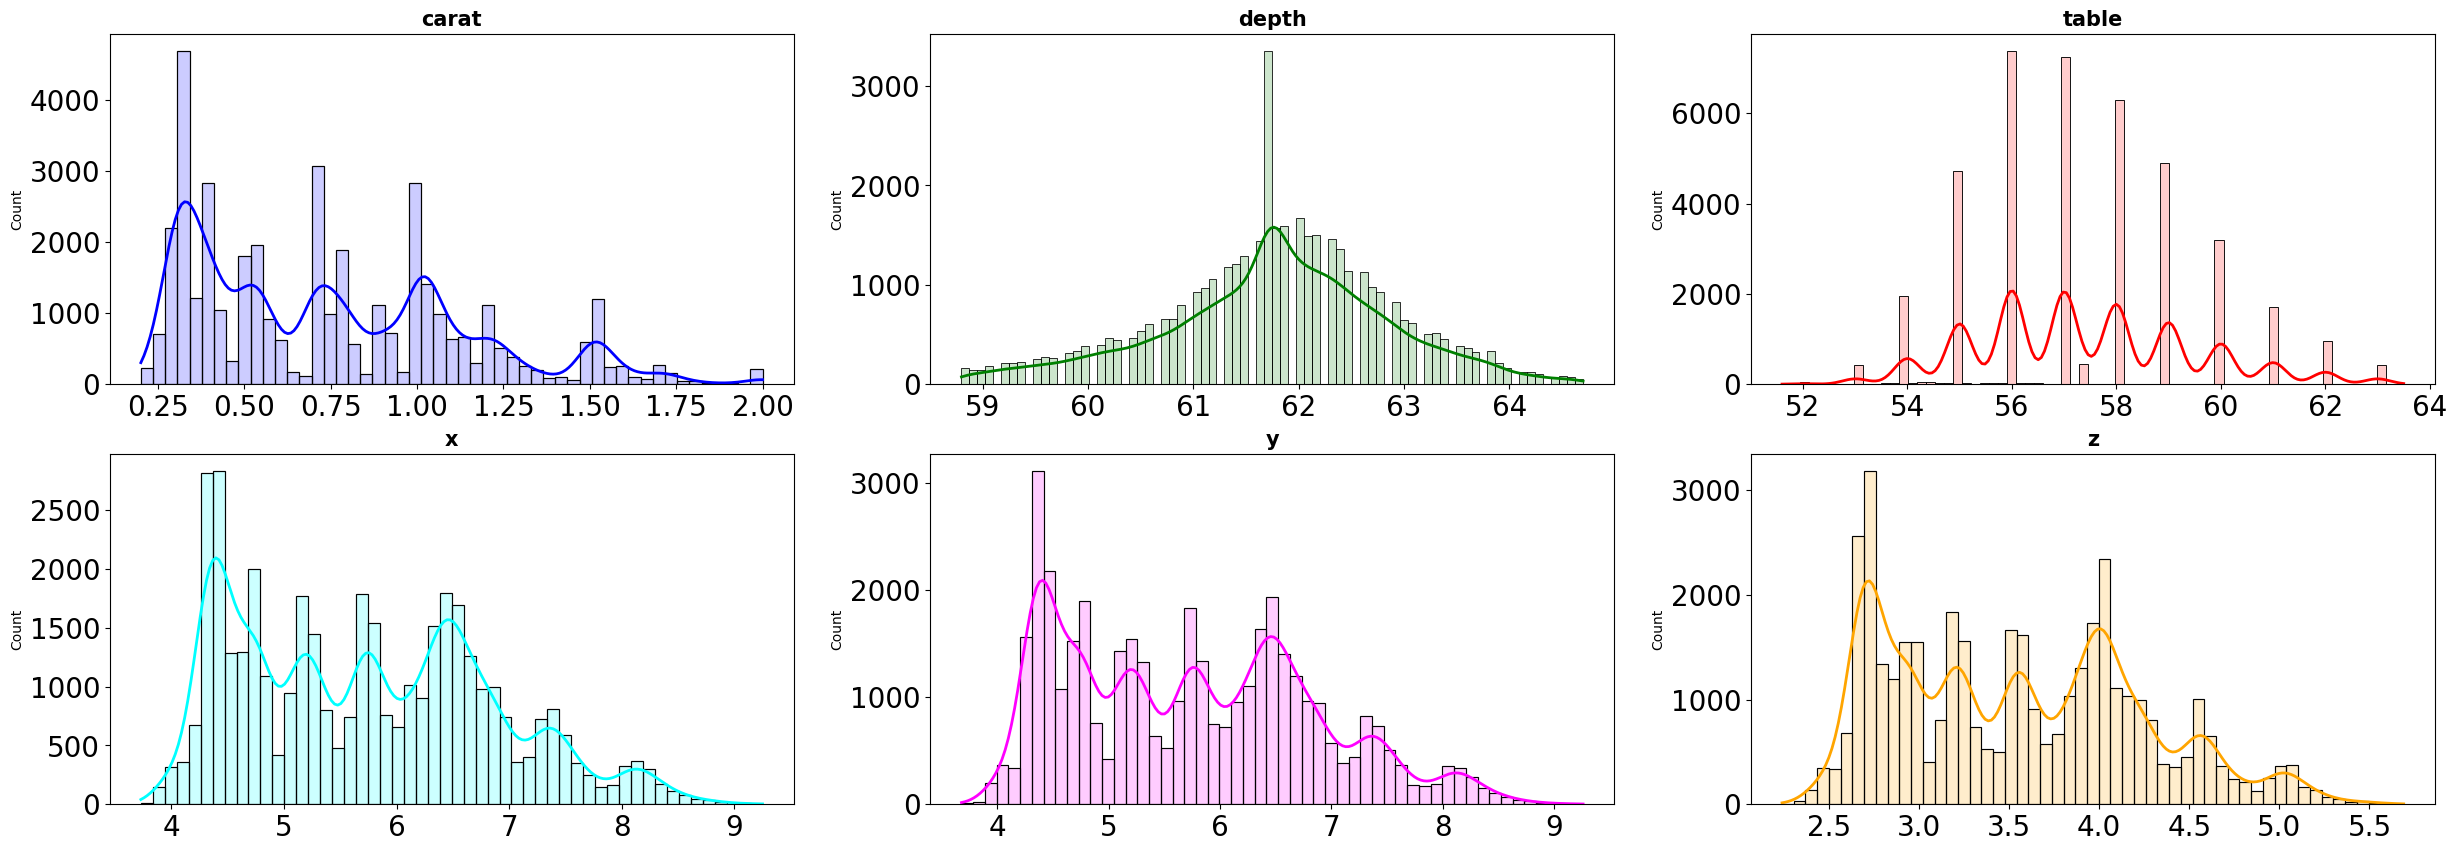

In [14]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout()
#fig.delaxes(axes[-1]) # Eliminamos el último eje que no se usa;

In [15]:
# guardamos el csv con los valores cambiados

df.to_csv("../01_data/train_nonull_nooutliers_encoding_estandarizado.csv")